# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Asshofiatul Azhar
- **Email:** asshofi.azhar@gmail.com
- **ID Dicoding:** asshofi_azhar

## Menentukan Pertanyaan Bisnis

- Bagaimana performa pengguna kasual dan pengguna terdaftar dalam 2 tahun terakhir?
- Pada tahun 2011-2012 musim apa paling sedikit jumlah pengguna kasual menyewa sepeda?
- Pada pukul berapa paling banyak jumlah pengguna terdaftar menyewa sepeda selama tahun 2011-2012?

## Import Semua Packages/Library yang Digunakan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [8]:
from google.colab import files
day = files.upload()
hour = files.upload()

Saving day.csv to day.csv


Saving hour.csv to hour.csv


In [9]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

## Menilai tabel day_df

In [10]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [11]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Menilai tabel hour_df

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [15]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [16]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [17]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

## Membersihkan tabel day_df

### Memperbaiki Tipe Data

In [18]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [19]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [20]:
columns = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for column in columns:
    day_df[column] =  day_df[column].astype("category")

### Mengubah isi kolom sesuai dengan keterangannya

In [21]:
day_df.season.replace((1,2,3,4), ('Springer','Summer','Fall','Winter'), inplace=True)
day_df.yr.replace((0,1),('2011','2012'), inplace=True)
day_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Agt','Sep','Oct','Nov','Des'), inplace=True)
day_df.weekday.replace((0,1,2,3,4,5,6),('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
day_df.workingday.replace((0,1),('no','yes'),inplace=True)
day_df.weathersit.replace((1,2,3,4),('Clear','Mist','Light Snow','Heavy Rain'), inplace=True)

In [22]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,Jan,0,Saturday,no,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,Jan,0,Sunday,no,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,Jan,0,Monday,yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,Jan,0,Tuesday,yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,Jan,0,Wednesday,yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Membersihkan tabel hour_df

## Memperbaiki tipe data

In [23]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [24]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [25]:
columns = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for column in columns:
    hour_df[column] =  hour_df[column].astype("category")

### Mengubah isi kolom sesuai dengan keterangannya

In [26]:
hour_df.season.replace((1,2,3,4), ('Springer','Summer','Fall','Winter'), inplace=True)
hour_df.yr.replace((0,1),('2011','2012'), inplace=True)
hour_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Agt','Sep','Oct','Nov','Des'), inplace=True)
hour_df.weekday.replace((0,1,2,3,4,5,6),('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour_df.workingday.replace((0,1),('no','yes'),inplace=True)
hour_df.weathersit.replace((1,2,3,4),('Clear','Mist','Light Snow','Heavy Rain'), inplace=True)

In [27]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,Jan,0,0,Saturday,no,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,Jan,1,0,Saturday,no,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,Jan,2,0,Saturday,no,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,Jan,3,0,Saturday,no,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,Jan,4,0,Saturday,no,Clear,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore day_df

In [28]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
173,174,2011-06-23,Fall,2011,Jun,0,Thursday,yes,Mist,0.728333,0.693833,0.703333,0.238804,746,4044,4790
374,375,2012-01-10,Springer,2012,Jan,0,Tuesday,yes,Clear,0.308696,0.318826,0.646522,0.187552,173,3425,3598
187,188,2011-07-07,Fall,2011,Jul,0,Thursday,yes,Clear,0.750000,0.686871,0.651250,0.159200,754,3838,4592
345,346,2011-12-12,Winter,2011,Des,0,Monday,yes,Clear,0.238333,0.270196,0.670833,0.063450,143,3167,3310
272,273,2011-09-30,Winter,2011,Sep,0,Friday,yes,Clear,0.564167,0.544829,0.647500,0.206475,830,4372,5202


In [29]:
day_df.describe(include="all")

<ipython-input-29-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731.0,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,2,12,2.0,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,2012,Jan,0.0,Sunday,yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,366,62,710.0,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [30]:
day_df.instant.is_unique

True

In [31]:
day_df.groupby(by="season").agg({
    "casual": ["sum" ]
})

,casual
,sum
season,
Springer,60622
Summer,203522
Fall,226091
Winter,129782


In [32]:
day_df.groupby(by="mnth").agg({
    "cnt": ["min","max","mean" ]
})

cnt                   
       min   max         mean
mnth                         
Jan    431  4521  2176.338710
Feb   1005  5062  2655.298246
Mar    605  8362  3692.258065
Apr    795  7460  4484.900000
May   2633  8294  5349.774194
Jun   3767  8120  5772.366667
Jul   3285  8173  5563.677419
Agt   1115  7865  5664.419355
Sep   1842  8714  5766.516667
Oct     22  8156  5199.225806
Nov   1495  6852  4247.183333
Des    441  6606  3403.806452

### Explore hour_df

In [33]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
7744,7745,2011-11-24,Winter,2011,Nov,7,1,Thursday,no,Clear,0.26,0.2727,0.75,0.1045,9,31,40
2468,2469,2011-04-17,Summer,2011,Apr,18,0,Sunday,no,Clear,0.56,0.5303,0.30,0.3881,102,175,277
10944,10945,2012-04-06,Summer,2012,Apr,4,0,Friday,yes,Clear,0.34,0.3182,0.49,0.2537,2,3,5
8130,8131,2011-12-10,Winter,2011,Des,10,0,Saturday,no,Clear,0.32,0.3030,0.57,0.2537,31,161,192
12932,12933,2012-06-28,Fall,2012,Jun,1,0,Thursday,yes,Clear,0.66,0.6212,0.54,0.0000,11,14,25


In [34]:
hour_df.describe(include="all")

<ipython-input-34-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,2,12,NaN,2.0,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,2012,May,NaN,0.0,Saturday,yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,8734,1488,NaN,16879.0,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,NaN,NaN,6.914405,NaN,NaN,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [35]:
day_df.instant.is_unique

True

In [36]:
hour_df.groupby(by=["hr","yr"]).agg({
    "registered": ["sum" ]
})

registered
               sum
hr yr             
0  2011      12117
   2012      19638
1  2011       7487
   2012      11968
2  2011       5091
   2012       7849
3  2011       2487
   2012       3794
4  2011       1386
   2012       2168
5  2011       4729
   2012       8520
6  2011      19424
   2012      32691
7  2011      53162
   2012      92972
8  2011      88498
   2012     156742
9  2011      50622
   2012      86358
10 2011      34446
   2012      58022
11 2011      40016
   2012      68018
12 2011      50192
   2012      84504
13 2011      49187
   2012      83019
14 2011      45385
   2012      75178
15 2011      47727
   2012      80816
16 2011      64883
   2012     109031
17 2011     106159
   2012     176481
18 2011      98919
   2012     166357
19 2011      71277
   2012     120007
20 2011      51858
   2012      86314
21 2011      40030
   2012      64845
22 2011      30646
   2012      48766
23 2011      20123
   2012      32753

In [37]:
hour_df.groupby(by="weathersit").agg({
    "cnt": ["min","max","mean" ]
})

cnt                 
           min  max        mean
weathersit                     
Clear        1  977  204.869272
Mist         1  957  175.165493
Light Snow   1  891  111.579281
Heavy Rain  23  164   74.333333

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa pengguna kasual dan pengguna terdaftar dalam 2 tahun terakhir?

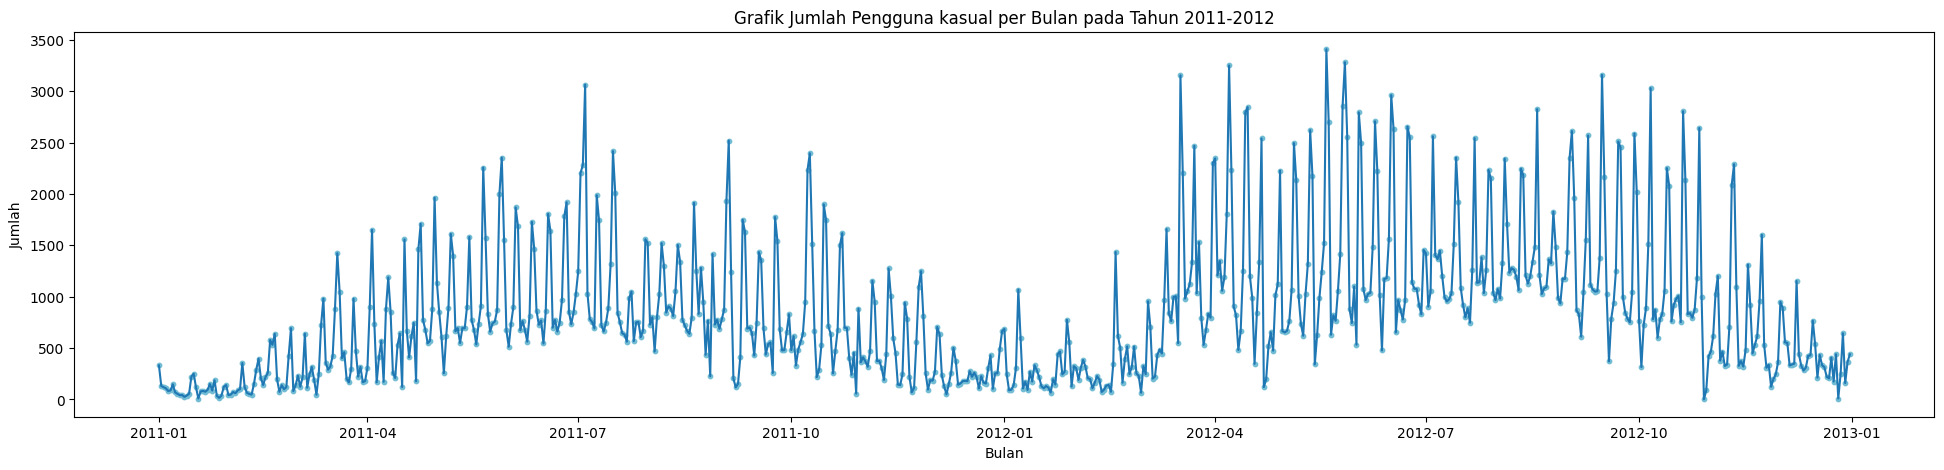

In [38]:
plt.figure(figsize=(24, 5))
monthly_counts = day_df['casual'].groupby(day_df['dteday']).max()
plt.scatter(monthly_counts.index, monthly_counts.values, c="#72BCD4", s=10, marker='o')
plt.plot(monthly_counts.index, monthly_counts.values)
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.title('Grafik Jumlah Pengguna kasual per Bulan pada Tahun 2011-2012')
plt.show()

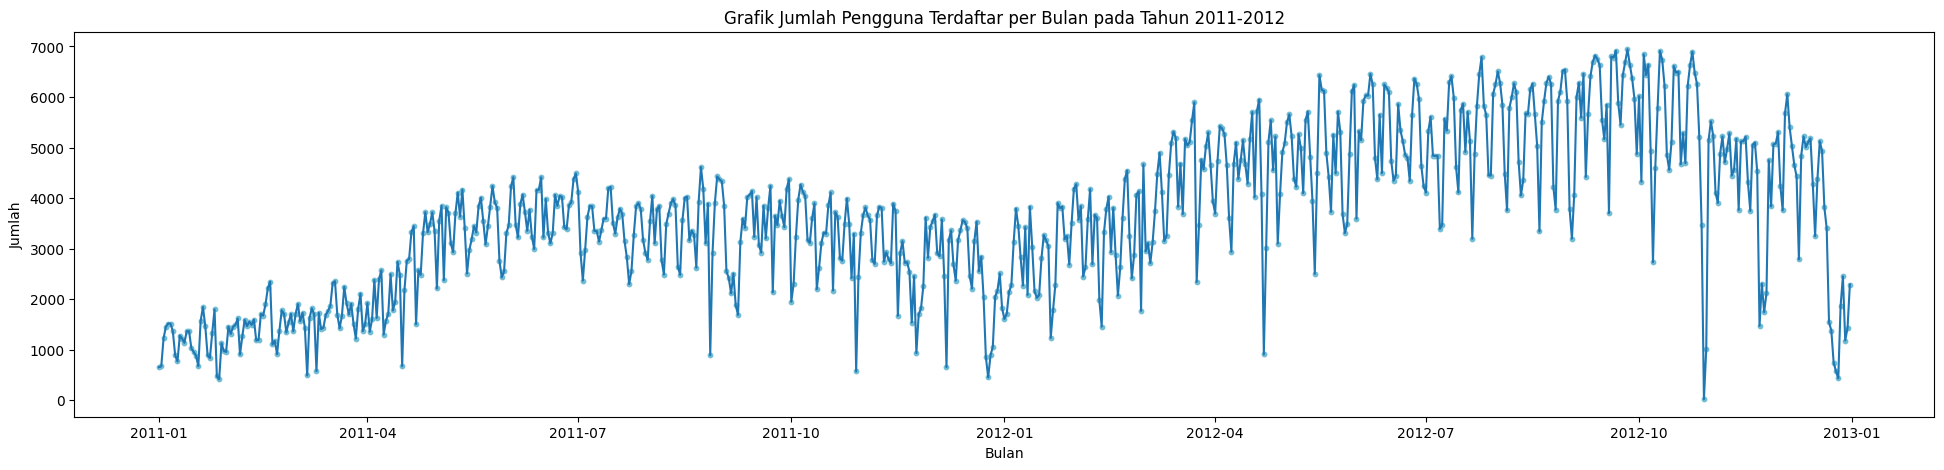

In [39]:
plt.figure(figsize=(24, 5))
monthly_counts = day_df['registered'].groupby(day_df['dteday']).max()
plt.scatter(monthly_counts.index, monthly_counts.values, c="#72BCD4", s=10, marker='o')
plt.plot(monthly_counts.index, monthly_counts.values)
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.title('Grafik Jumlah Pengguna Terdaftar per Bulan pada Tahun 2011-2012')
plt.show()

### Pertanyaan 2: Pada tahun 2011-2012 musim apa paling sedikit jumlah pengguna kasual menyewa sepeda?




<ipython-input-40-6165e0b076b1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


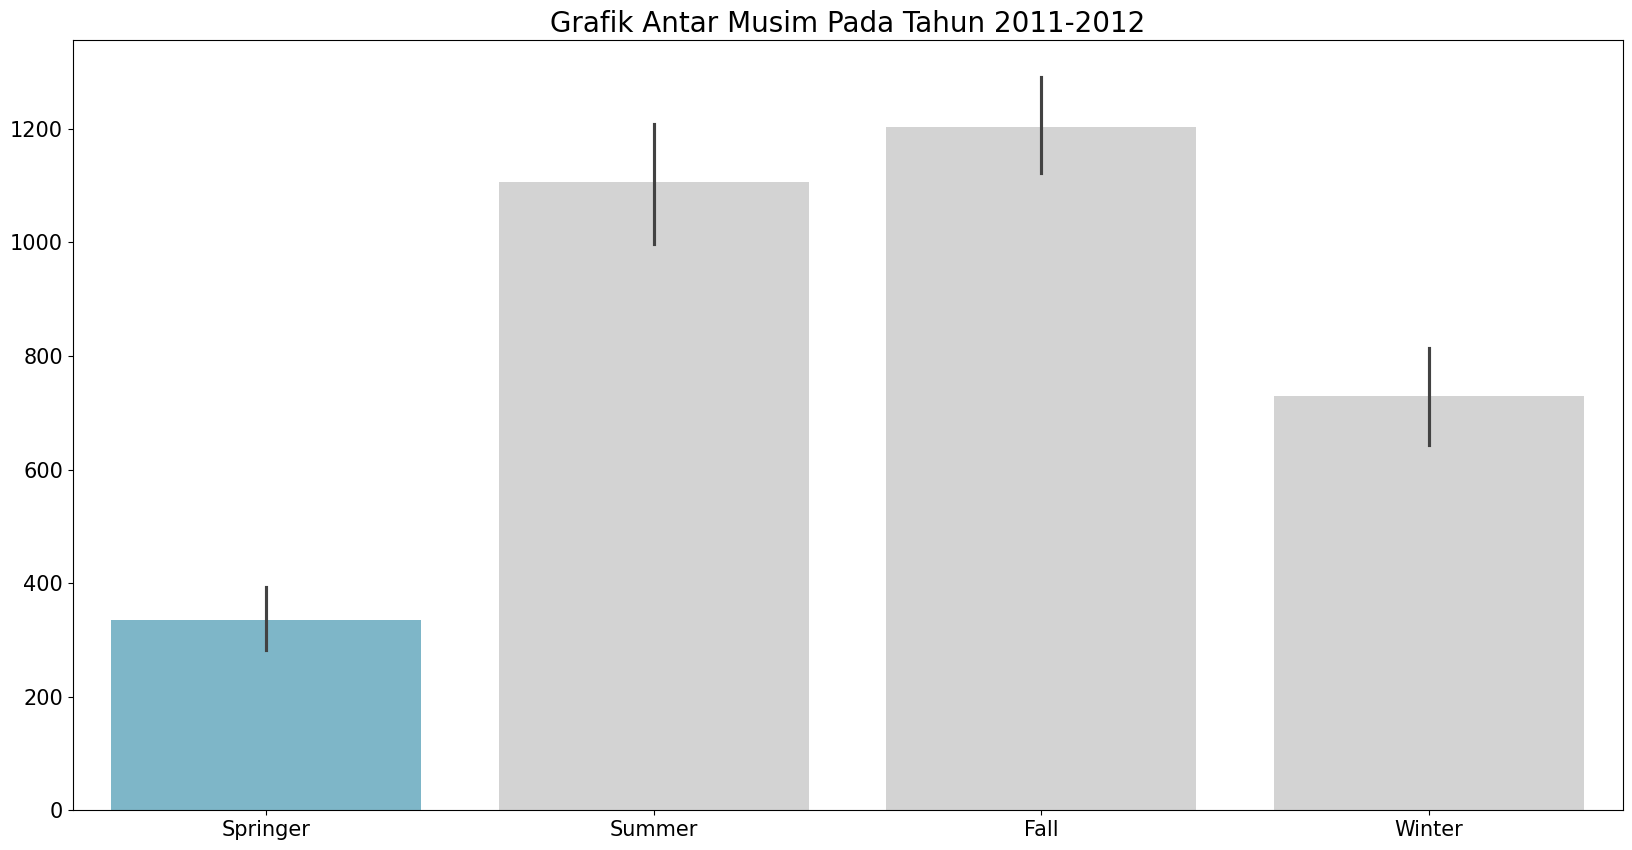

In [40]:
colors =  ["#72BCD4","#D3D3D3", "#D3D3D3", "#D3D3D3"]
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(
        y="casual",
        x="season",
        data=day_df.sort_values(by="season", ascending=False),
        palette=colors,
        ax=ax
    )
# mengatur judul, label y dan x, serta tick params untuk subplot tersebut
ax.set_title("Grafik Antar Musim Pada Tahun 2011-2012", loc="center", fontsize=20)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# menampilkan plot
plt.show()

### Pertanyaan 3: Pada pukul berapa paling banyak jumlah pengguna terdaftar menyewa sepeda selama tahun 2011-2012?

In [41]:
sum_order_items_df = hour_df.groupby("hr").registered.sum().sort_values(ascending=False).reset_index()

<ipython-input-42-b99184ef3217>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hr", y="registered", data=sum_order_items_df.head(5), palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3"], ax=ax)


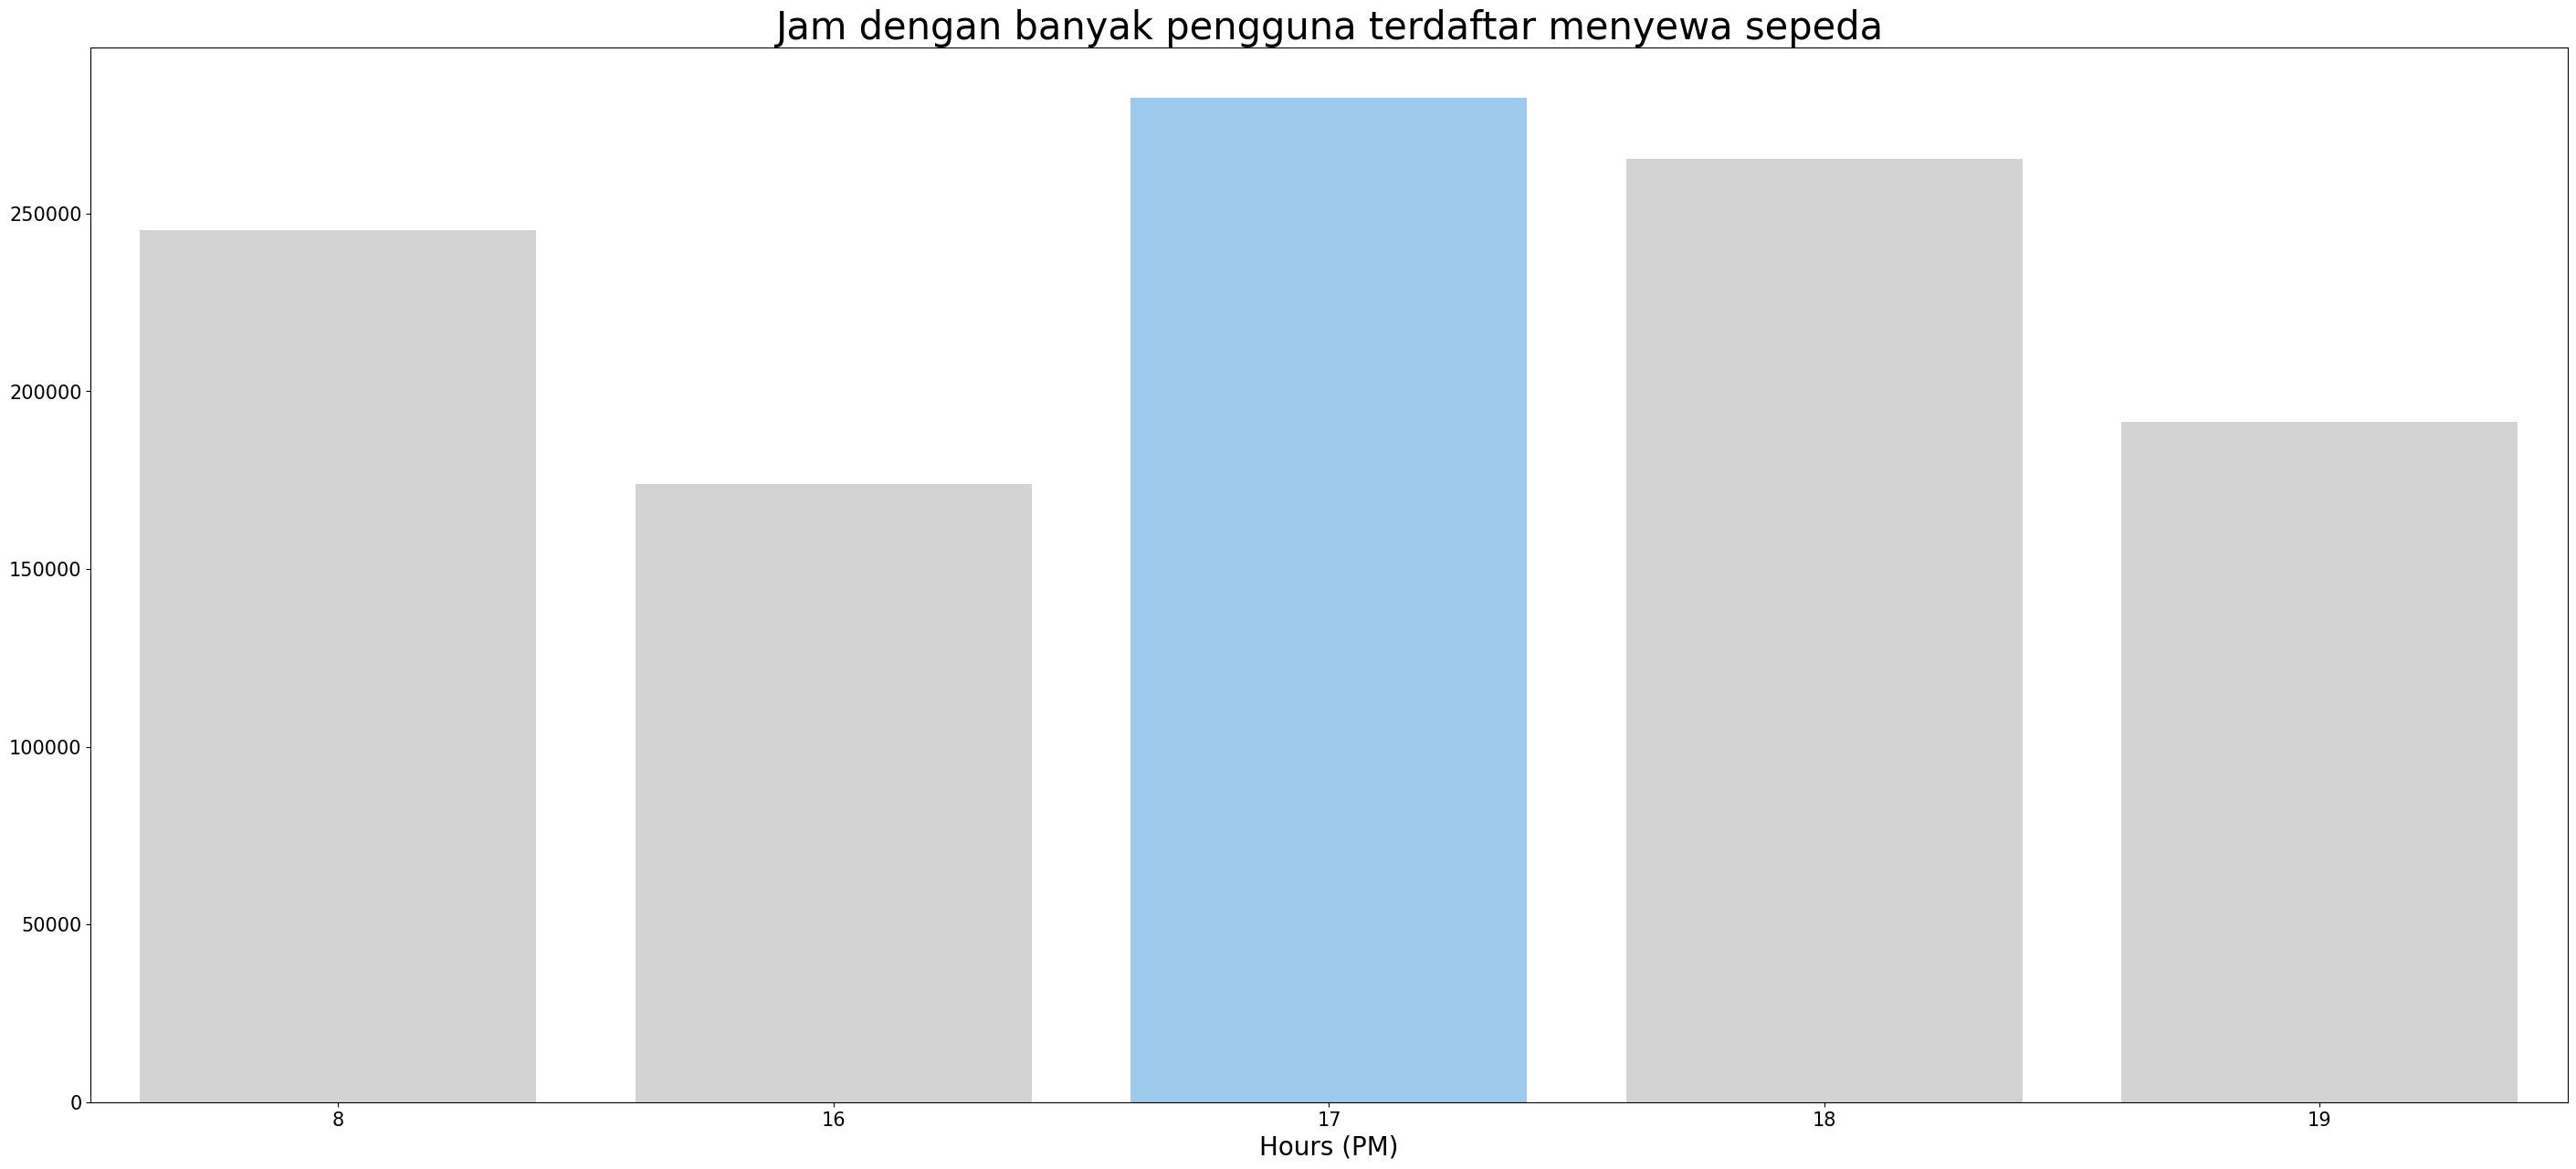

In [42]:
fig, ax = plt.subplots(figsize=(35, 15))
sns.barplot(x="hr", y="registered", data=sum_order_items_df.head(5), palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3"], ax=ax)
ax.set_ylabel(None)
ax.set_xlabel("Hours (PM)", fontsize=20)
ax.set_title("Jam dengan banyak pengguna terdaftar menyewa sepeda", loc="center", fontsize=30)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)
plt.show()

In [43]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00


In [45]:
!wget -q -O - ipv4.icanhazip.com

35.199.12.53


In [ ]:
! streamlit run dashboard.py & npx localtunnel --port 8501

[..................] / fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.199.12.53:8501

npx: installed 22 in 2.63s
your url is: https://famous-baths-draw.loca.lt
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/content/dashboard.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hr", y="registered", data=sum_order_items_df.head(5), palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3"], ax=ax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


## Conclusion

Pertanyaan:
1. Bagaimana performa pengguna kasual dan pengguna terdaftar dalam 2 tahun terakhir?
2. Pada tahun 2011-2012 musim apa paling sedikit jumlah pengguna kasual menyewa sepeda?
3. Pada pukul berapa paling banyak jumlah pengguna terdaftar menyewa sepeda selama tahun 2011-2012?

- Conclution pertanyaan 1:Berdasarkan grafik di atas, kita dapat mengetahui bahwa jumlah pengguna kasual terbanyak terjadi pada bulan Mei 2012 dan kita juga dapat mengetahui adanya penurunan jumlah pengguna kasual yang cukup signifikan pada bulan oktober 2012 dan  kita dapat melihat bahwa jumlah pengguna terdaftar terbanyak terjadi pada bulan September 2012 dan kita juga dapat mengetahui adanya penurunan jumlah pengguna terdaftar yang cukup signifikan pada bulan oktober 2012.
- Conclution pertanyaan 2: Musim apa paling sedikit jumlah pengguna kasual menyewa sepeda yaitu musim springer.
- conclusin pertanyaan 3: Pukul 17 merupakan waktu paling banyak jumlah pengguna terdaftar menyewa sepeda.